In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  KFold
from sklearn.metrics import accuracy_score
import copy
from joblib import dump
import cv2
import os
import numpy as np


In [33]:
def ReadImages(directory):
    result = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Assuming the images are in JPG or PNG format
            file_path = os.path.join(directory, filename)
            image = cv2.imread(file_path, 0)
            image = cv2.resize(image,(200, 200))
            image = image.flatten()
            result.append(image)
    return result

In [34]:
Normal = ReadImages('./ML_Final_Project_Dataset/Normal/')
Papilledema = ReadImages('./ML_Final_Project_Dataset/Papilledema/')
Pseudopapilledema = ReadImages('./ML_Final_Project_Dataset/Pseudopapilledema/')
X_train = Normal + Papilledema + Pseudopapilledema
X_train = np.array(X_train)
y_train = np.concatenate((np.zeros(len(Normal)),
                          np.ones(len(Papilledema)),
                          np.full(len(Pseudopapilledema), 2)))
len(X_train), len(y_train)

(1369, 1369)

In [35]:
Results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in range(1, 1001):
    fold_accuracies = []
    i = 1
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
        rf_classifier = RandomForestClassifier(n_estimators=k, random_state=42)
        rf_classifier.fit(X_train_fold, y_train_fold)
        y_pred_fold = rf_classifier.predict(X_val_fold)
        fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
        fold_accuracies.append({
            'accuracy': copy.deepcopy(fold_accuracy), 
            'model': copy.deepcopy(rf_classifier),
            'k-fold':copy.deepcopy(i)
        })
        print({
            'accuracy': copy.deepcopy(fold_accuracy),
            'model': copy.deepcopy(rf_classifier),
            'k-fold': copy.deepcopy(i)
        })
        i += 1
    Total = 0
    for fold in fold_accuracies:
        Total += fold['accuracy']
    # Calculate the average accuracy across all folds
    accuracy = Total / len(fold_accuracies)
    Results.append({
        'n_estimators': copy.deepcopy(k),
        'avg_accuracy': copy.deepcopy(accuracy),
        'Models_Detailes': copy.deepcopy(fold_accuracies)
    })


{'accuracy': 0.6167883211678832, 'model': RandomForestClassifier(n_estimators=1, random_state=42), 'k-fold': 1}
{'accuracy': 0.5948905109489051, 'model': RandomForestClassifier(n_estimators=1, random_state=42), 'k-fold': 2}
{'accuracy': 0.6094890510948905, 'model': RandomForestClassifier(n_estimators=1, random_state=42), 'k-fold': 3}
{'accuracy': 0.6496350364963503, 'model': RandomForestClassifier(n_estimators=1, random_state=42), 'k-fold': 4}
{'accuracy': 0.5970695970695971, 'model': RandomForestClassifier(n_estimators=1, random_state=42), 'k-fold': 5}
{'accuracy': 0.6678832116788321, 'model': RandomForestClassifier(n_estimators=2, random_state=42), 'k-fold': 1}
{'accuracy': 0.6313868613138686, 'model': RandomForestClassifier(n_estimators=2, random_state=42), 'k-fold': 2}
{'accuracy': 0.6970802919708029, 'model': RandomForestClassifier(n_estimators=2, random_state=42), 'k-fold': 3}
{'accuracy': 0.6678832116788321, 'model': RandomForestClassifier(n_estimators=2, random_state=42), 'k-fo

KeyboardInterrupt: 

In [37]:
MaxMoldel = None
max = -1
for model in Results:
    if model['avg_accuracy'] > max:
        max = model['avg_accuracy']
        MaxMoldel = model
print('{\r\n'+'\tn_estimators: ' + str(MaxMoldel['n_estimators'])+"\r\n\tAvarage Accuracy: "+str(MaxMoldel['avg_accuracy']))

{
	n_estimators: 100
	Avarage Accuracy: 0.8246865057084035


K-fold 0 Accuracy: 0.8941605839416058
[[155   2   2]
 [  5  41  10]
 [  7   3  49]]


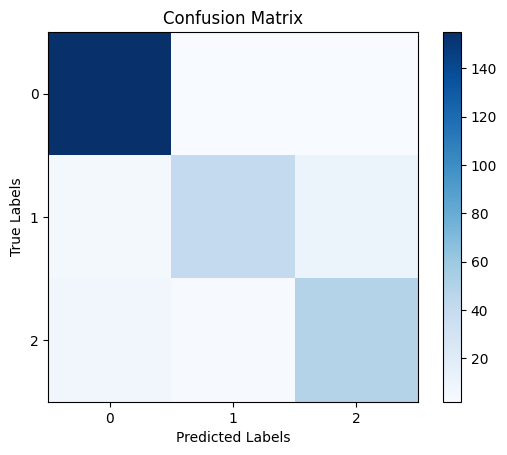

K-fold 1 Accuracy: 0.7883211678832117
[[153   2   2]
 [ 20  28  14]
 [ 16   4  35]]


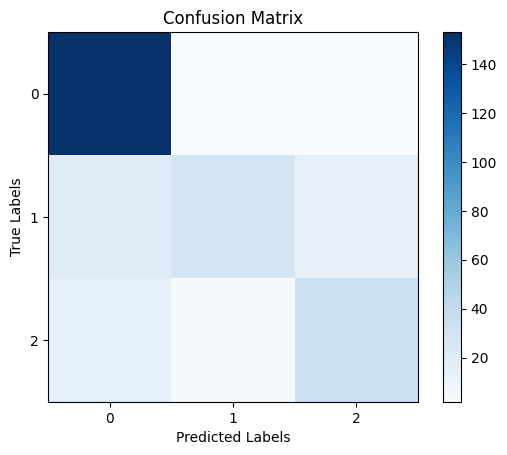

K-fold 2 Accuracy: 0.8065693430656934
[[150   9   2]
 [ 11  36  11]
 [ 12   8  35]]


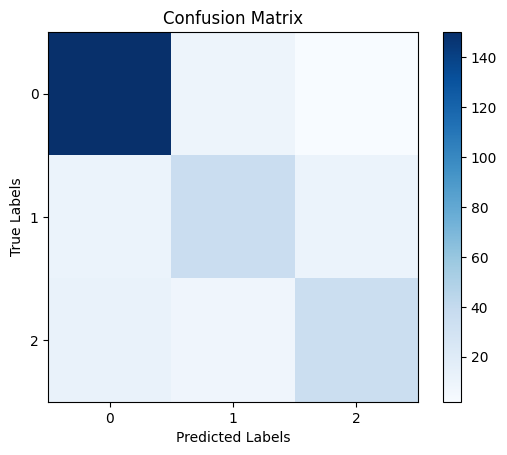

K-fold 3 Accuracy: 0.8138686131386861
[[147   2   6]
 [ 12  41   7]
 [ 20   4  35]]


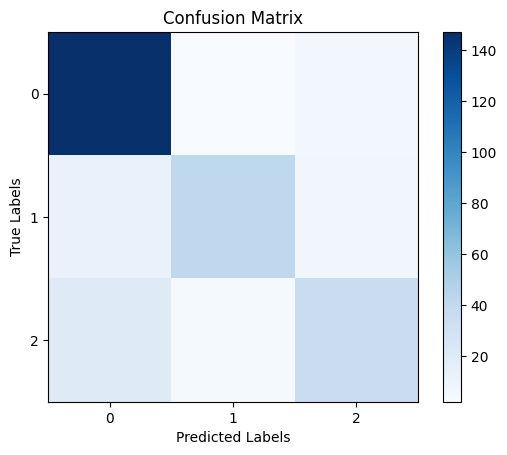

K-fold 4 Accuracy: 0.8205128205128205
[[140   6   1]
 [ 17  35   7]
 [ 10   8  49]]


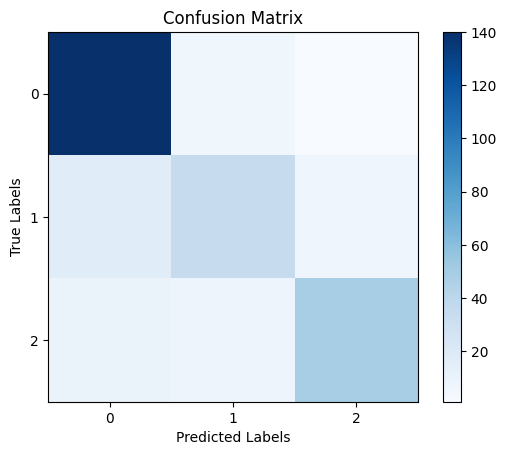

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
kf = KFold(n_splits=5, shuffle=True, random_state=42)
i = 0
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    model = MaxMoldel['Models_Detailes'][i]['model']
    y_pred_fold = model.predict(X_val_fold)
    cm = confusion_matrix(y_val_fold, y_pred_fold)
    print("K-fold", i, "Accuracy:",MaxMoldel['Models_Detailes'][i]['accuracy'])
    print(cm)
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.xticks(np.arange(3))
    plt.yticks(np.arange(3))
    plt.show()
    i+=1


In [39]:
# Save the Model
for model in MaxMoldel['Models_Detailes']:
    dump(model['model'], './Saved Models/George/Kfold_' + str(model['k-fold'])+'-'+str(model['accuracy'])+'.joblib')


In [41]:
from joblib import load, dump
loaded_model = load('./Saved Models/Fawzy/5nn0.joblib')
loaded_model

KNeighborsClassifier()